In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_cab = pd.read_csv("Cab_Data.csv")
df_city = pd.read_csv("City.csv")
df_customer = pd.read_csv("Customer_ID.csv")
df_transacton = pd.read_csv("Transaction_ID.csv")

df_cab["profit per km"] = (df_cab['Price Charged'] - df_cab['Cost of Trip']) / df_cab['KM Travelled']

print(f"Cab_Data.csv: {df_cab.shape}")
print(f"City.csv: {df_city.shape}")
print(f"Customer_ID.csv: {df_customer.shape}")
print(f"Transaction_ID.csv: {df_transacton.shape}")


Cab_Data.csv: (359392, 8)
City.csv: (20, 3)
Customer_ID.csv: (49171, 4)
Transaction_ID.csv: (440098, 3)


In [162]:
merged_df = pd.merge(df_transacton, df_cab, on='Transaction ID', how='left')
merged_df = pd.merge(merged_df, df_customer, on='Customer ID', how='left')
merged_df = pd.merge(merged_df, df_city, on='City', how='left')

merged_df = merged_df.dropna()

merged_df['Date of Travel'] = pd.to_datetime(merged_df['Date of Travel'], format='%m/%d/%y')
merged_df['Year'] = merged_df['Date of Travel'].dt.year
merged_df['Month'] = merged_df['Date of Travel'].dt.month

merged_df['Gender'] = merged_df['Gender'].replace({'Male': 1, 'Female': 0})
merged_df['Payment_Mode'] = merged_df['Payment_Mode'].replace({'Card': 1, 'Cash': 0})

print(merged_df.head())
print(merged_df.shape)
print(merged_df.columns)

   Transaction ID  Customer ID  Payment_Mode Date of Travel   Company  \
0        10000011        29290             1     2016-01-08  Pink Cab   
1        10000012        27703             1     2016-01-06  Pink Cab   
2        10000013        28712             0     2016-01-02  Pink Cab   
3        10000014        28020             0     2016-01-07  Pink Cab   
4        10000015        27182             1     2016-01-03  Pink Cab   

         City  KM Travelled  Price Charged  Cost of Trip  profit per km  \
0  ATLANTA GA         30.45         370.95       313.635       1.882266   
1  ATLANTA GA         28.62         358.52       334.854       0.826904   
2  ATLANTA GA          9.04         125.20        97.632       3.049558   
3  ATLANTA GA         33.17         377.40       351.602       0.777751   
4  ATLANTA GA          8.73         114.62        97.776       1.929439   

   Gender  Age  Income (USD/Month) Population     Users  Year  Month  
0       1   28               10813   81

Year  Company   
2016  Pink Cab      3.026813
      Yellow Cab    7.489847
2017  Pink Cab      2.962883
      Yellow Cab    7.494612
2018  Pink Cab      2.350447
      Yellow Cab    6.364805
Name: profit per km, dtype: float64


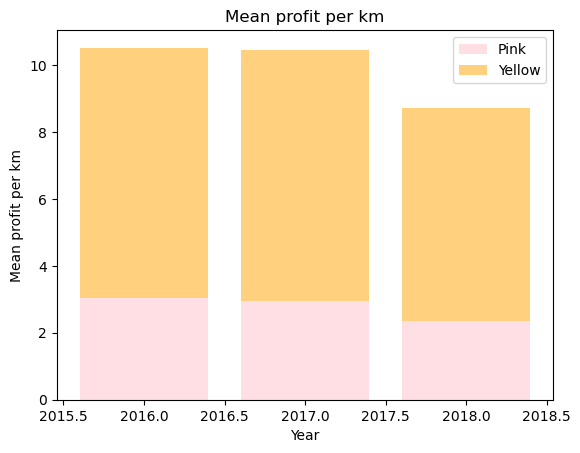

In [123]:
import matplotlib.pyplot as plt

mean_profit_per_km = merged_df.groupby(['Year', 'Company'])['profit per km'].mean()
print(mean_profit_per_km)

temp = mean_profit_per_km.unstack()
mean_profit_per_km_pink = temp['Pink Cab'].values
mean_profit_per_km_yellow = temp['Yellow Cab'].values

plt.bar([2016, 2017, 2018],mean_profit_per_km_pink, alpha=0.5,color='pink', label='Pink')
plt.bar([2016, 2017, 2018],mean_profit_per_km_yellow, bottom=mean_profit_per_km_pink, alpha=0.5,color='orange', label='Yellow')
plt.title("Mean profit per km")
plt.xlabel('Year')
plt.ylabel('Mean profit per km')
plt.legend()
plt.show()

Year  Company   
2016  Pink Cab      1.713511e+06
      Yellow Cab    1.392700e+07
2017  Pink Cab      2.033655e+06
      Yellow Cab    1.657598e+07
2018  Pink Cab      1.560162e+06
      Yellow Cab    1.351740e+07
Name: profit, dtype: float64


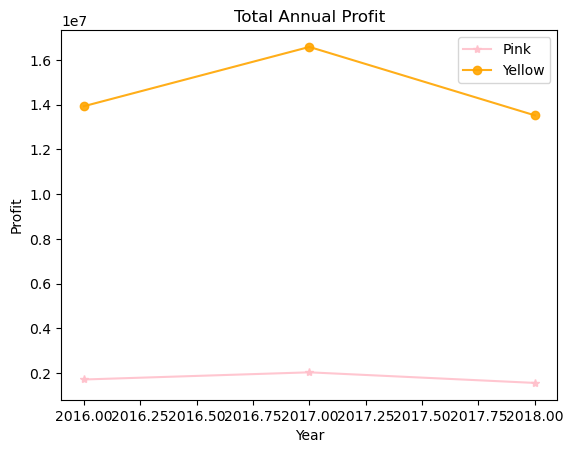

In [202]:
merged_df['profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']
total_profit_per_yr = merged_df.groupby(['Year', 'Company'])['profit'].sum()
print(total_profit_per_yr)

temp = total_profit_per_yr.unstack()
total_profit_per_yr_pink = temp['Pink Cab'].values
total_profit_per_yr_yellow = temp['Yellow Cab'].values

plt.plot([2016, 2017, 2018],total_profit_per_yr_pink,'-*', alpha=0.9, color='pink',  label='Pink')
plt.plot([2016, 2017, 2018],total_profit_per_yr_yellow , '-o',alpha=0.9,color='orange', label='Yellow')
plt.title("Total Annual Profit")
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend()
plt.show()

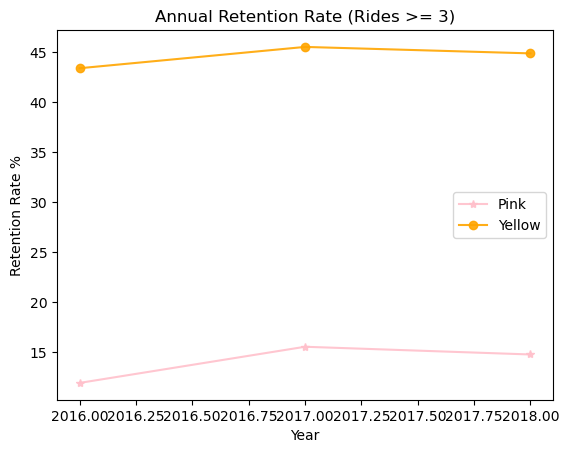

In [227]:
customer_counts = merged_df.groupby(['Company','Year','Customer ID'])['Customer ID'].size().reset_index(name='Frequency')
yearly_counts = customer_counts.groupby(['Company', 'Year'])['Frequency'].size().reset_index(name='Total Count')

threshold = 3

filtered_counts = customer_counts.loc[customer_counts['Frequency'] >= threshold]
num_ids = filtered_counts.groupby(['Year', 'Company'])['Customer ID'].nunique()

pink_2016 = 100*(num_ids[2016, 'Pink Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Pink Cab') & (yearly_counts['Year'] == 2016), 'Total Count'])
pink_2017 = 100*(num_ids[2017, 'Pink Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Pink Cab') & (yearly_counts['Year'] == 2017), 'Total Count'])
pink_2018 = 100*(num_ids[2018, 'Pink Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Pink Cab') & (yearly_counts['Year'] == 2018), 'Total Count'])

yellow_2016 = 100*(num_ids[2016, 'Yellow Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Yellow Cab') & (yearly_counts['Year'] == 2016), 'Total Count'])
yellow_2017 = 100*(num_ids[2017, 'Yellow Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Yellow Cab') & (yearly_counts['Year'] == 2017), 'Total Count'])
yellow_2018 = 100*(num_ids[2018, 'Yellow Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Yellow Cab') & (yearly_counts['Year'] == 2018), 'Total Count'])


plt.plot([2016, 2017, 2018],[pink_2016,pink_2017,pink_2018],'-*', alpha=0.9, color='pink',  label='Pink')
plt.plot([2016, 2017, 2018],[yellow_2016,yellow_2017,yellow_2018] , '-o',alpha=0.9,color='orange', label='Yellow')
plt.title(f"Annual Retention Rate (Rides >= {threshold})")
plt.xlabel('Year')
plt.ylabel('Retention Rate %')
plt.legend()
plt.show()

In [238]:
import matplotlib.pyplot as plt

gender_counts = merged_df.groupby(['Company','Year','Gender'])['Gender'].size().reset_index(name='Gender Counts')
tot_passengers = gender_counts.groupby(['Company','Year'])['Gender Counts'].sum().reset_index(name='Total passengers')
gender_counts_tot = gender_counts.merge(tot_passengers, on=['Company', 'Year'])

gender_counts_tot['Gender Percentage'] = gender_counts_tot['Gender Counts'].div(gender_counts_tot['Total passengers'])

pink_gender_pct = gender_counts_tot.loc[(gender_counts_tot['Company']== 'Pink Cab'),'Gender Percentage'].values
yellow_gender_pct = gender_counts_tot.loc[(gender_counts_tot['Company']== 'Yellow Cab'),'Gender Percentage'].values

print(gender_counts_tot)
print(pink_gender_pct)
print(yellow_gender_pct)

pink_male = []
pink_female = []
yellow_male = []
yellow_female = []
for i in range(len(pink_gender_pct)):
    if (i+1)%2==0:
        pink_male.append(pink_gender_pct[i])
        yellow_male.append(yellow_gender_pct[i])
    else:
        pink_female.append(pink_gender_pct[i])
        yellow_female.append(yellow_gender_pct[i])



       Company  Year  Gender  Gender Counts  Total passengers  \
0     Pink Cab  2016       0          10873             25080   
1     Pink Cab  2016       1          14207             25080   
2     Pink Cab  2017       0          13475             30321   
3     Pink Cab  2017       1          16846             30321   
4     Pink Cab  2018       0          13132             29310   
5     Pink Cab  2018       1          16178             29310   
6   Yellow Cab  2016       0          33861             82239   
7   Yellow Cab  2016       1          48378             82239   
8   Yellow Cab  2017       0          41785             98189   
9   Yellow Cab  2017       1          56404             98189   
10  Yellow Cab  2018       0          40354             94253   
11  Yellow Cab  2018       1          53899             94253   

    Gender Percentage  
0            0.433533  
1            0.566467  
2            0.444411  
3            0.555589  
4            0.448038  
5         